In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
### Description of the code
### Name: Ana Hoban, ID: 260870004
### Collab: Maude Larivière

<IPython.core.display.Javascript object>


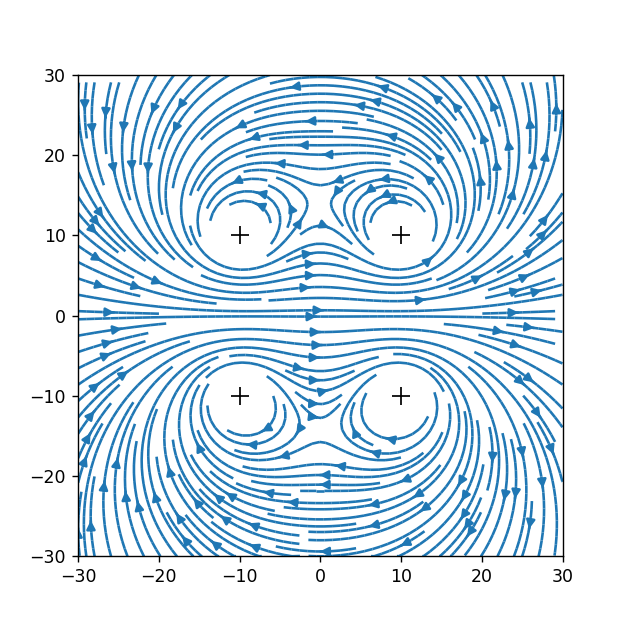

In [59]:
# Setting up the initial conditions (vortex centres and circulation)

# Vortex rings
scale = 10
r_mask = 4 # Masking radius for better visualization
x_v = scale*np.array([-1.,1.,-1.,1.]) # x position of the 4 vortices
y_v = scale*np.array([-1.,-1.,1.,1.]) # y position of the 4 vortices
k_v = np.array([-3.,-3.,3.,3.]) # line vortex cte k of the vortices
# circulation is 2 * pi * k_v

# Setting up the plot
plt.ion()
fig, ax = plt.subplots(1,1,figsize=(5,5))

# Mark initial positions of vortices
p, = ax.plot(x_v, y_v, 'k+', markersize=10)

# Draw the initial velocity streamline
ngrid = 30
Y, X = np.mgrid[-ngrid:ngrid:600j, -ngrid:ngrid:600j]

vel_x = np.zeros(np.shape(X))
vel_y = np.zeros(np.shape(Y))

for i in range(len(x_v)):
    # insert lines for computing the total velocity field
    r = np.sqrt((X-x_v[i])**2+(Y-y_v[i])**2)
    phi = np.arctan2((Y-y_v[i]),(X-x_v[i])) #rad
    vel_x += -k_v[i]/r * np.sin(phi)
    vel_y +=  k_v[i]/r * np.cos(phi)
    
    # # masking streamlines around center of vortices
    vel_x[r<r_mask] = np.nan
    vel_y[r<r_mask] = np.nan

#set up the boundaries of the sim box
ax.set_xlim([-ngrid,ngrid])
ax.set_ylim([-ngrid,ngrid])

#initial plot of the streamlines
ax.streamplot(X,Y,vel_x,vel_y, density=[2,2])
fig.canvas.draw()

<IPython.core.display.Javascript object>


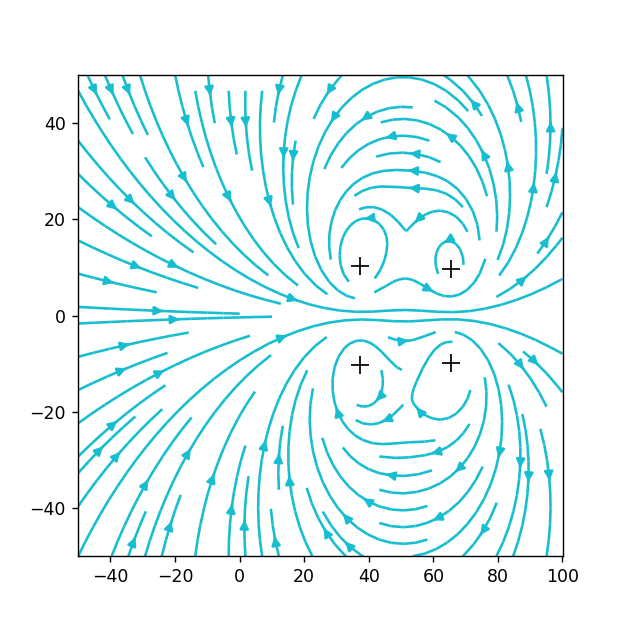

In [60]:
%matplotlib notebook
dt = 25
Nsteps = 50

# Setting up the plot
plt.ion()
fig, ax = plt.subplots(1,1,figsize=(5,5))

# Draw the initial velocity streamline
ngrid = 50
Y, X = np.mgrid[-ngrid:ngrid:600j, -ngrid:2*ngrid:600j]

p, = ax.plot(x_v, y_v, 'k+', markersize=10)

#time evolution
count = 0
while count < Nsteps:
    #compute and update advection velocity
    vel_x = np.zeros(np.shape(X))
    vel_y = np.zeros(np.shape(Y))
    x_v_next = np.zeros(len(x_v))
    y_v_next = np.zeros(len(y_v))
    
    for i in range(len(x_v)):
        #total advection velocity on each vortex   
        h_x =  x_v[i] - np.concatenate((x_v[:i],x_v[i+1:])) #dist between vortex i and every other point in x
        h_y =  y_v[i] - np.concatenate((y_v[:i],y_v[i+1:])) #dist between vortex i and every other point in y
        
        #vector h to every other point
        h = np.sqrt(h_x**2+h_y**2)
        theta = np.arctan2(h_y,h_x)
        
        #v_adv for vortex i given h computed above
        k_others = np.concatenate((k_v[:i],k_v[i+1:])) #only other k's
        adv = k_others/(2*np.pi*h)
    
        #update position of vortices
        x_v_next[i] = np.sum(adv*(-1*np.sin(theta))*dt)
        y_v_next[i] = np.sum(adv*np.cos(theta)*dt)
        
    x_v += x_v_next
    y_v += y_v_next
    
    #re initialize the total velocity field
    for i in range(len(x_v)):
        # update the streamlines and masking
        r = np.sqrt((X-x_v[i])**2+(Y-y_v[i])**2)
        phi = np.arctan2((Y-y_v[i]),(X-x_v[i])) #rad
        
        vel_x += -k_v[i]/r * np.sin(phi)
        vel_y +=  k_v[i]/r * np.cos(phi)
        
   
        # masking streamlines around center of vortices
        vel_x[r<r_mask] = np.nan
        vel_y[r<r_mask] = np.nan

    ##update plot
    ax.collections = []
    ax.patches = []
    
    p.set_xdata(x_v)
    p.set_ydata(y_v)
    
    ax.streamplot(X,Y,vel_x,vel_y, density=[1,1])
    
    fig.canvas.draw()
    
    plt.pause(0.00001)
    count += 1